# 3.2. Linear Regression Implementation from Scratch


In [1]:
!pip install d2l==0.14.2

     |████████████████████████████████| 53 kB 266 kB/s 


In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w,b,num_examples):
  X = torch.normal(0,1,(num_examples, len(w)))
  y = torch.matmul(X,w)+b
  y += torch.normal(0,0.01,y.shape)
  return X, y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w, true_b,1000)

In [5]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 1.6071, -0.3987]) 
label: tensor([8.7697])


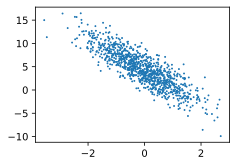

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

## 3.2.2. Reading the Dataset

In [7]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(
        indices[i:min(i+batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [9]:
batch_size = 10

for X,y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tensor([[-1.5213,  0.8341],
        [ 0.9621, -0.9258],
        [-0.4841, -0.5064],
        [-1.4318, -0.1509],
        [-0.8747, -0.8495],
        [ 1.5143,  1.2838],
        [ 0.2720, -1.6170],
        [ 1.3189, -2.2257],
        [ 0.4957, -1.3992],
        [ 0.5557, -0.2038]]) 
 tensor([[-1.6771],
        [ 9.2672],
        [ 4.9730],
        [ 1.8441],
        [ 5.3403],
        [ 2.8739],
        [10.2521],
        [14.3961],
        [ 9.9643],
        [ 6.0140]])


## 3.2.3. Initializing Model Parameters¶


In [10]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 3.2.4. Defining the Model¶


In [11]:
def linreg(X, w, b): 
    return torch.matmul(X, w) + b

## 3.2.5. Defining the Loss Function¶


In [12]:
def squared_loss(y_hat, y):  
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 3.2.6. Defining the Optimization Algorithm


In [14]:
def sgd(params, lr, batch_size): 
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 3.2.7. Training


In [15]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X,y in data_iter(batch_size, features, labels):
    l = loss(net(X,w,b),y)
    l.sum().backward()
    sgd([w,b], lr, batch_size) #update params using gradient
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.027029
epoch 2, loss 0.000094
epoch 3, loss 0.000049


In [16]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([3.2771e-04, 6.9141e-06], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0005], grad_fn=<RsubBackward1>)
